<h1>Animation Notebook</h1>

<IPython.core.display.Javascript object>


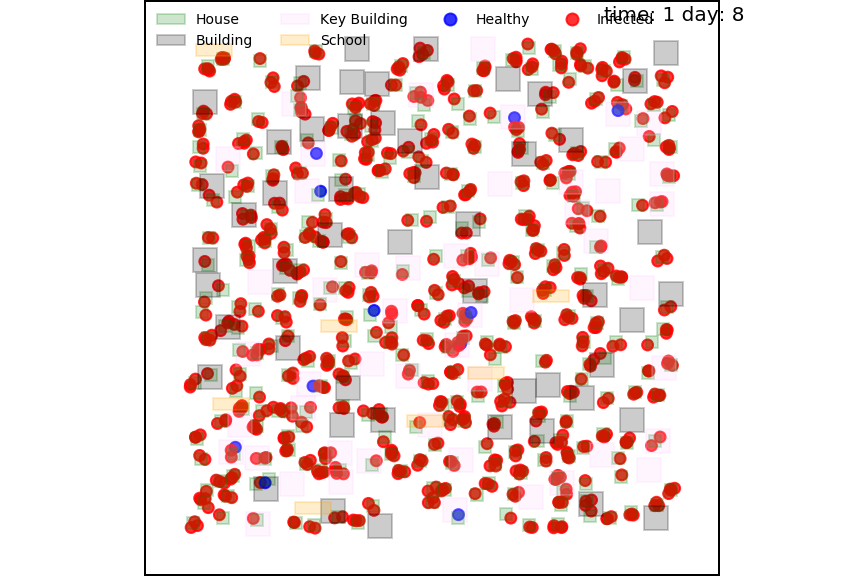

In [5]:
import matplotlib.pyplot as plt
from Person import Person, Worker, Child, Key_Worker
from EnvironmentClass import Environment, House, Transport
import numpy as np 
import time
import random
import sys
import matplotlib.animation as animation
from Website_animation_code import Simulation
from matplotlib.lines import Line2D
%matplotlib notebook

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles = ax.scatter([], [], c=[],s=30, cmap="bwr")


bounds = [-120, 120, -120, 120]
# rect is the box edge
rect = plt.Rectangle(bounds[::2],
                     bounds[1] - bounds[0],
                     bounds[3] - bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)
def init():
    """initialize animation"""
    print('init animation func')
    global sim, rect
    sim = Simulation([50, 50], 10, 300, 20, 50)
    rect.set_edgecolor('k')
    proxy = []
    # plotting houses
    house_centre_points = [sim.houselist[i].position for i in range(len(sim.houselist))]
    house_edges = [[house_centre_points[i][0]+(sim.houselist[i].size[0]/2),
                    house_centre_points[i][1]+(sim.houselist[i].size[1]/2),
                    house_centre_points[i][0]-(sim.houselist[i].size[0]/2),
                    house_centre_points[i][1]-(sim.houselist[i].size[1]/2)] 
                   for i in range(len(sim.houselist))]
    houses = [plt.Rectangle([house_centre_points[i][0]-(sim.houselist[i].size[0]/2),
                             house_centre_points[i][1]-(sim.houselist[i].size[1]/2)],
                            house_edges[i][0] - house_edges[i][2],
                            house_edges[i][1] - house_edges[i][3],
                            color='green', alpha=0.2) for i in range(len(sim.houselist))]    
    proxy.append(plt.Rectangle([0, 0], sim.houselist[0].size[0], sim.houselist[0].size[1], color='green', alpha=0.2))
    for house in houses:
        ax.add_patch(house)
    # plotting buildings
    building_centre_points = [sim.buildinglist[i].position for i in range(len(sim.buildinglist))]
    building_edges = [[building_centre_points[i][0]+(sim.buildinglist[i].size[0]/2),
                       building_centre_points[i][1]+(sim.buildinglist[i].size[1]/2),
                       building_centre_points[i][0]-(sim.buildinglist[i].size[0]/2),
                       building_centre_points[i][1]-(sim.buildinglist[i].size[1]/2)] 
                      for i in range(len(sim.buildinglist))]
    buildings = [plt.Rectangle([building_centre_points[i][0]-(sim.buildinglist[i].size[0]/2),
                                building_centre_points[i][1]-(sim.buildinglist[i].size[1]/2)],
                               building_edges[i][0] - building_edges[i][2],
                               building_edges[i][1] - building_edges[i][3],
                               color='black', alpha=0.2) for i in range(len(sim.buildinglist))]
    proxy.append(plt.Rectangle([0, 0], sim.buildinglist[0].size[0], sim.buildinglist[0].size[1], color='black', alpha=0.2))
    for building in buildings:
        ax.add_patch(building)
    # plotting key buildings
    key_building_centre_points = [sim.key_buildinglist[i].position for i in range(len(sim.key_buildinglist))]
    key_building_edges = [[key_building_centre_points[i][0]+(sim.key_buildinglist[i].size[0]/2),
                           key_building_centre_points[i][1]+(sim.key_buildinglist[i].size[1]/2),
                           key_building_centre_points[i][0]-(sim.key_buildinglist[i].size[0]/2),
                           key_building_centre_points[i][1]-(sim.key_buildinglist[i].size[1]/2)]
                          for i in range(len(sim.key_buildinglist))]
    key_buildings = [plt.Rectangle([key_building_centre_points[i][0]-(sim.key_buildinglist[i].size[0]/2),
                                    key_building_centre_points[i][1]-(sim.key_buildinglist[i].size[1]/2)],
                                   key_building_edges[i][0] - key_building_edges[i][2],
                                   key_building_edges[i][1] - key_building_edges[i][3],
                                   color='#fdd0ff', alpha=0.2) for i in range(len(sim.key_buildinglist))]
    proxy.append(plt.Rectangle([0, 0], sim.key_buildinglist[0].size[0], sim.key_buildinglist[0].size[1],
                               color='#fdd0ff', alpha=0.2))
    for key_building in key_buildings:
        ax.add_patch(key_building)
    # plotting schools
    school_centre_points = [sim.schoollist[i].position for i in range(len(sim.schoollist))]
    school_edges = [[school_centre_points[i][0]+(sim.schoollist[i].size[0]/2),
                     school_centre_points[i][1]+(sim.schoollist[i].size[1]/2),
                     school_centre_points[i][0]-(sim.schoollist[i].size[0]/2),
                     school_centre_points[i][1]-(sim.schoollist[i].size[1]/2)] for i in range(len(sim.schoollist))]
    schools = [plt.Rectangle([school_centre_points[i][0]-(sim.schoollist[i].size[0]/2),
                              school_centre_points[i][1]-(sim.schoollist[i].size[1]/2)],
                             school_edges[i][0] - school_edges[i][2],
                             school_edges[i][1] - school_edges[i][3],
                             color='orange', alpha=0.2) for i in range(len(sim.schoollist))]
    proxy.append(plt.Rectangle([0,0], sim.schoollist[0].size[0], sim.schoollist[0].size[1], color='orange', alpha=0.2))
    for school in schools:
        ax.add_patch(school)
    # legend symbol for healthy person
    proxy.append(Line2D(range(0), range(0), color="bwr"[0], marker='o', alpha=0.8, linewidth=0))
    # legend symbol for infected person
    proxy.append(Line2D(range(0), range(0), color="bwr"[2], marker='o', alpha=0.8, linewidth=0))
    ax.grid(False)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    ax.legend(proxy, ['House', 'Building', 'Key Building', 'School', 'Healthy', 'Infected'], loc='upper left',
              bbox_to_anchor=(0, 1), ncol = 4, fontsize=7, edgecolor='w', framealpha=0)
    return particles, rect


def animate(i):
    """perform animation step"""
    global sim, rect, ax, fig

    sim.update()
    rect.set_edgecolor('k')
    infection_status = np.array(sim.state[1])
    ax.set_xlim(-120,120)
    ax.set_ylim(-120,120)
    text = str(sim.hour) 
    fig.suptitle('time: '+text+' day: '+str(sim.day),fontsize=10,fontweight=50, x=0.78, y=0.99)
    positions = [pos+np.random.uniform(low = -2, high=2, size=2) for pos in sim.state[0]]
    particles.set_offsets(positions)
    particles.set_array(infection_status)
    particles.set_alpha(0.8)
    print(percentage)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=20000,
                              interval=100, blit=False, init_func=init)
plt.show()
